In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Download latest version
path = kagglehub.dataset_download("fidelissauro/inflacao-brasil")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fidelissauro/inflacao-brasil/versions/8


  referencia referencia_dt  referencia_num  ipca_variacao
0    1980-01    1980-01-01     1980.000000           6.62
1    1980-02    1980-02-01     1980.083333           4.62
2    1980-03    1980-03-01     1980.166667           6.04
3    1980-04    1980-04-01     1980.250000           5.29
4    1980-05    1980-05-01     1980.333333           5.70
Coeficiente de Determinação (R²) no conjunto de teste: 0.17
Previsão para referência 2024.9166666666667: 4.21%
Previsão para referência 2025.0833333333333: 4.28%


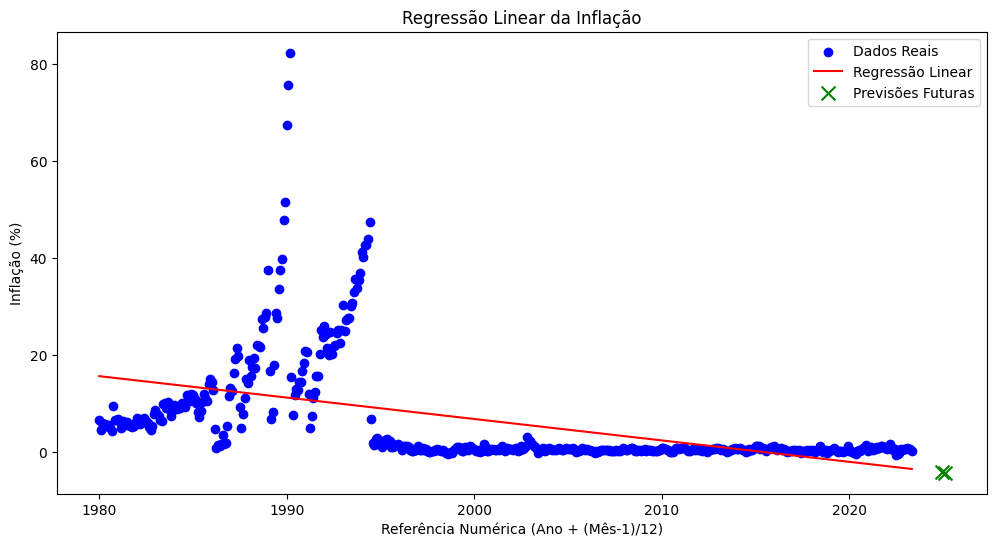

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv(f"{path}/inflacao.csv")

df['referencia_dt'] = pd.to_datetime(df['referencia'], format="%Y-%m", errors='coerce')

df['referencia_num'] = df['referencia_dt'].dt.year + (df['referencia_dt'].dt.month - 1) / 12

df["ipca_variacao"] = pd.to_numeric(df["ipca_variacao"], errors='coerce')

print(df[['referencia', 'referencia_dt', 'referencia_num', 'ipca_variacao']].head())

X = df["referencia_num"].values.reshape(-1, 1)
y = df["ipca_variacao"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred_test = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Coeficiente de Determinação (R²) no conjunto de teste: {r2:.2f}")

data_test = ["2024-12", "2025-02"]

data_test_dt = pd.to_datetime(data_test, format="%Y-%m")

referencias_futuras = data_test_dt.year + (data_test_dt.month - 1) / 12
referencias_futuras = referencias_futuras.values.reshape(-1, 1)

predicoes = modelo.predict(referencias_futuras)

for ref, pred in zip(referencias_futuras.flatten(), predicoes):
    print(f"Previsão para referência {ref}: {(pred * -1):.2f}%")

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label="Dados Reais")
plt.plot(X, modelo.predict(X), color='red', label="Regressão Linear")
plt.scatter(referencias_futuras, predicoes, color='green', marker='x', s=100, label="Previsões Futuras")
plt.xlabel("Referência Numérica (Ano + (Mês-1)/12)")
plt.ylabel("Inflação (%)")
plt.title("Regressão Linear da Inflação")
plt.legend()
plt.show()


In [35]:
print(df["ipca_variacao"].tolist())

[6.62, 4.62, 6.04, 5.29, 5.7, 5.31, 5.55, 4.95, 4.23, 9.48, 6.67, 6.61, 6.84, 6.4, 4.97, 6.46, 5.56, 5.52, 6.26, 5.5, 5.26, 5.08, 5.27, 5.93, 6.97, 6.64, 5.71, 5.89, 6.66, 7.1, 6.36, 5.97, 5.08, 4.44, 5.29, 7.81, 8.64, 7.86, 7.34, 6.58, 6.48, 9.88, 10.08, 9.11, 10.3, 8.87, 7.38, 8.68, 9.67, 9.5, 8.94, 9.54, 9.05, 10.08, 9.72, 9.35, 11.75, 10.44, 10.53, 11.98, 11.76, 10.87, 10.16, 8.2, 7.2, 8.49, 10.31, 12.05, 11.12, 10.62, 13.97, 15.07, 14.37, 12.72, 4.77, 0.78, 1.4, 1.27, 1.71, 3.55, 1.72, 1.9, 5.45, 11.65, 13.21, 12.64, 16.37, 19.1, 21.45, 19.71, 9.21, 4.87, 7.78, 11.22, 15.08, 14.15, 18.89, 15.7, 17.6, 19.29, 17.42, 22.0, 21.91, 21.59, 27.45, 25.62, 27.94, 28.7, 37.49, 16.78, 6.82, 8.33, 17.92, 28.65, 27.74, 33.71, 37.56, 39.77, 47.82, 51.5, 67.55, 75.73, 82.39, 15.52, 7.59, 11.75, 12.92, 12.88, 14.41, 14.36, 16.81, 18.44, 20.75, 20.72, 11.92, 4.99, 7.43, 11.19, 12.41, 15.63, 15.63, 20.23, 25.21, 23.71, 25.94, 24.32, 21.4, 19.93, 24.86, 20.21, 21.83, 22.14, 24.63, 25.24, 22.49, 25.2